   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

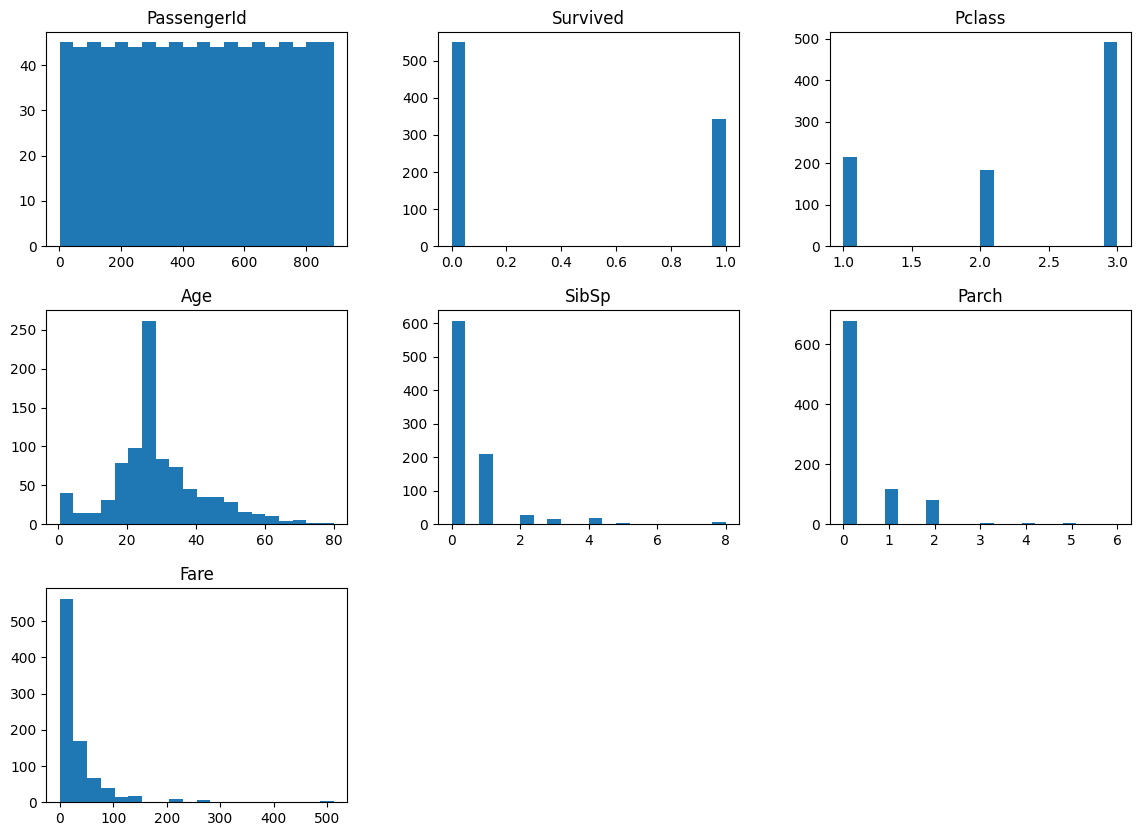

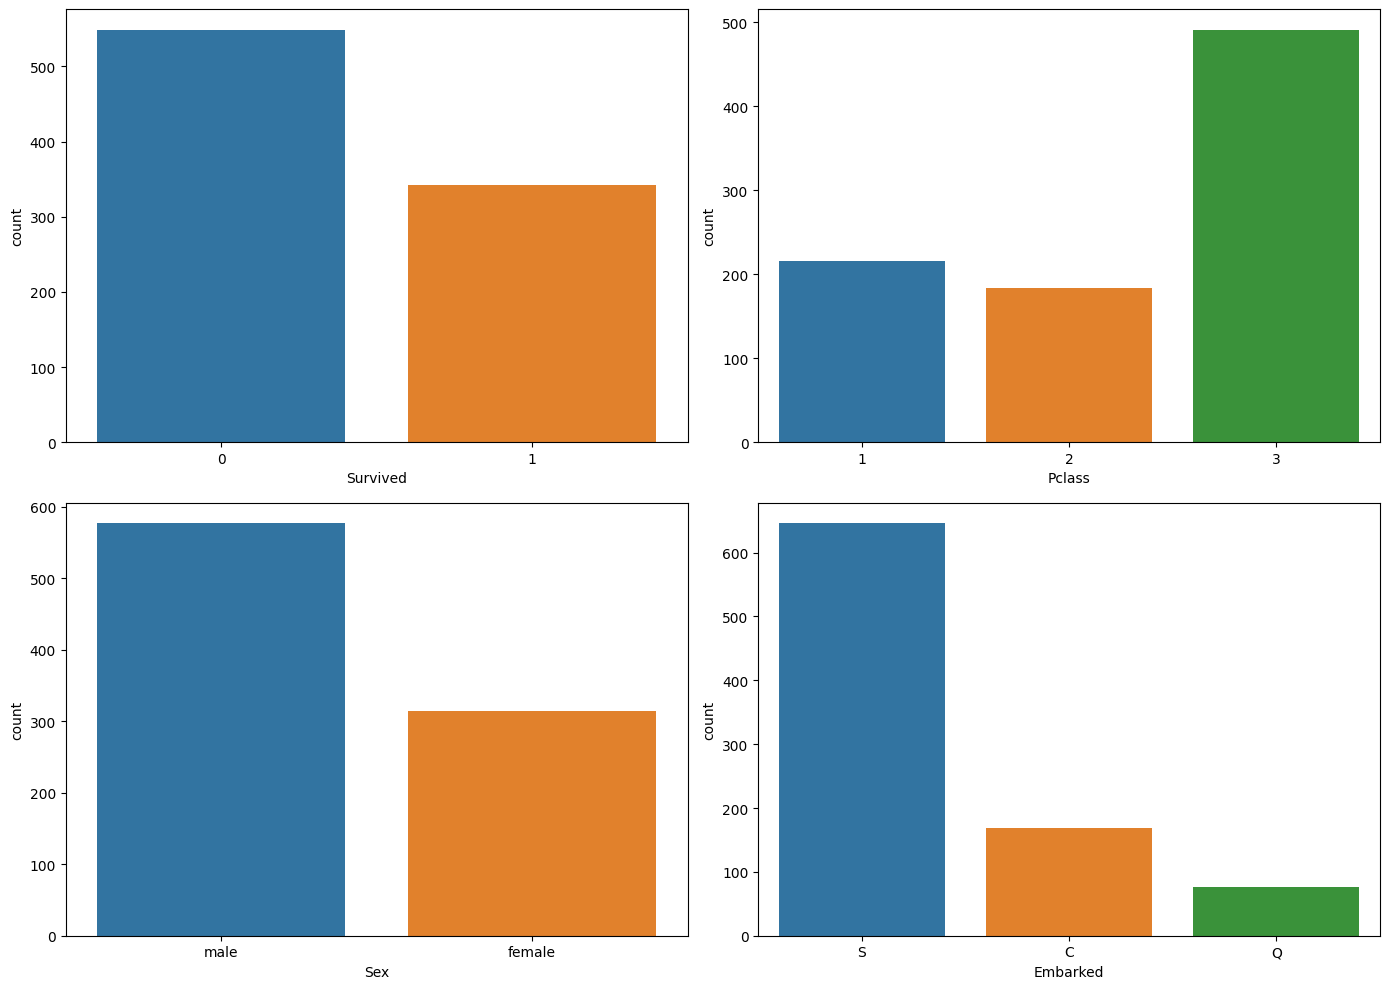

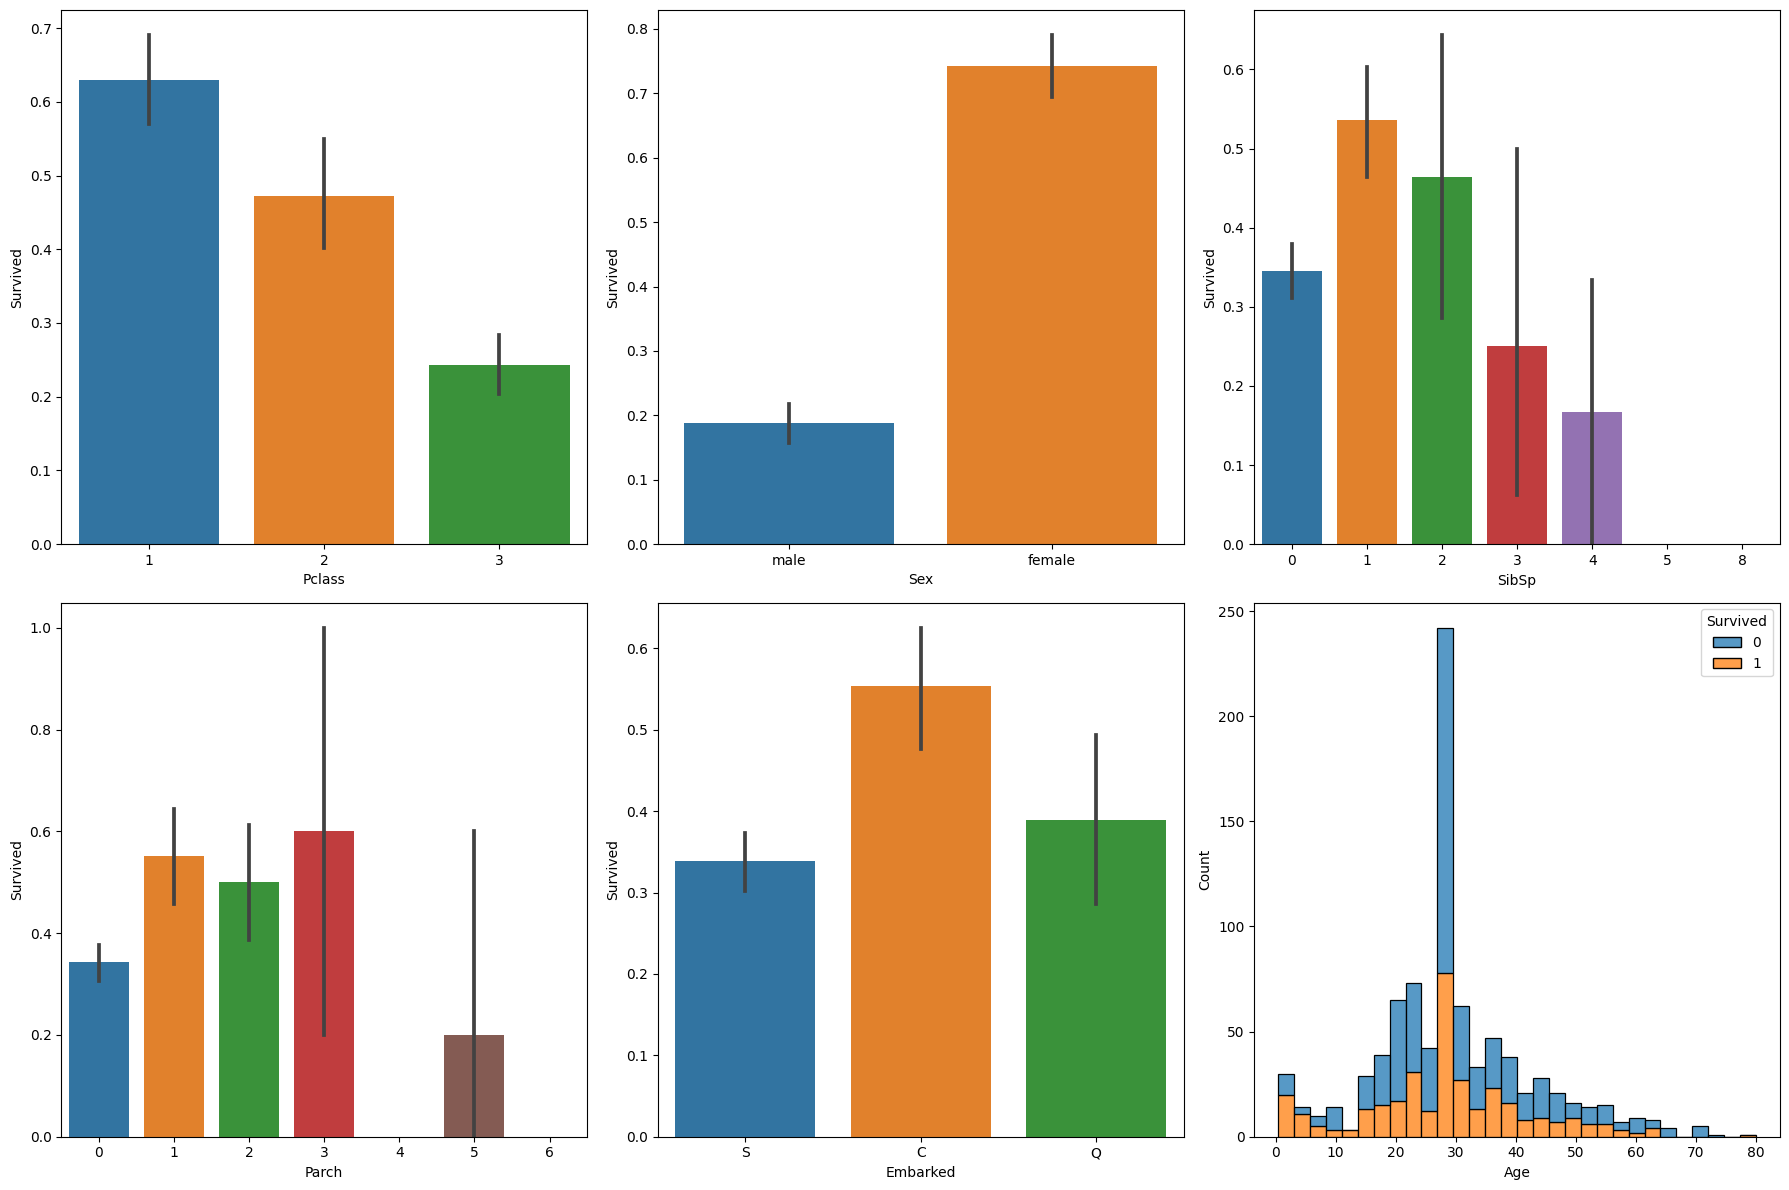

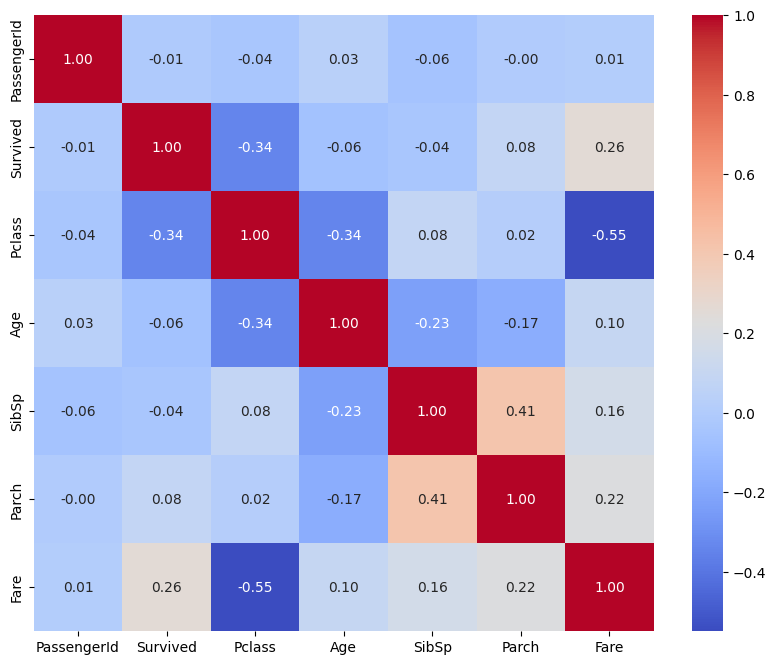

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df = pd.read_csv("F:/prodigy/titanic.csv")
print(df.head())
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.dropna(subset=['Fare'], inplace=True)
print(df.isnull().sum())
print(df.describe())
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.hist(bins=20, figsize=(14, 10), grid=False)
plt.show()
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
sns.countplot(x='Pclass', data=df, ax=axes[0, 1])
sns.countplot(x='Sex', data=df, ax=axes[1, 0])
sns.countplot(x='Embarked', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0])
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
sns.barplot(x='SibSp', y='Survived', data=df, ax=axes[0, 2])
sns.barplot(x='Parch', y='Survived', data=df, ax=axes[1, 0])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[1, 1])
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', ax=axes[1, 2])
plt.tight_layout()
plt.show()
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.dropna()
numeric_df = numeric_df.fillna(0)
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
